# 4.0.2 Working with Lower Dimensional BK Representations

There are several different representations of the BK dataset that were used in the papers. Looking at some of them here.

## Jupyter Extensions

Load [watermark](https://github.com/rasbt/watermark) to see the state of the machine and environment that's running the notebook. To make sense of the options, take a look at the [usage](https://github.com/rasbt/watermark#usage) section of the readme.

In [6]:
# Load `watermark` extension
%load_ext watermark
# Display the status of the machine and packages. Add more as necessary.
%watermark -v -n -m -g -b -t -p torch,torchvision,cv2,h5py,pandas,matplotlib,seaborn,jupyterlab,lab

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Tue Feb 18 2020 15:49:54 

CPython 3.6.10
IPython 7.12.0

torch 1.3.1
torchvision 0.1.8
cv2 3.4.2
h5py 2.8.0
pandas 1.0.1
matplotlib 3.1.3
seaborn 0.10.0
jupyterlab 1.2.6
lab 0+untagged.17.g65d1464.dirty

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-72-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 16
interpreter: 64bit
Git hash   : 65d146415bb454429f7ac0a49578999aa234ee1c
Git branch : master


Load [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which will always reload modules marked with `%aimport`.

This behavior can be inverted by running `autoreload 2` which will set everything to be auto-reloaded *except* for modules marked with `%aimport`.

In [2]:
# Load `autoreload` extension
%load_ext autoreload
# Set autoreload behavior
%autoreload 1

Load `matplotlib` in one of the more `jupyter`-friendly [rich-output modes](https://ipython.readthedocs.io/en/stable/interactive/plotting.html). Some options (that may or may not have worked) are `inline`, `notebook`, and `gtk`.

In [3]:
# Set the matplotlib mode
%matplotlib inline

## Set the GPU

Make sure we aren't greedy.

In [4]:
!nvidia-smi

Tue Feb 18 14:05:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.30                 Driver Version: 390.30                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN Xp            Off  | 00000000:04:00.0 Off |                  N/A |
| 23%   27C    P8    16W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:05:00.0 Off |                  N/A |
| 23%   30C    P8    16W / 250W |      0MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [5]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


## Imports

In [37]:
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

Local imports that may or may not be autoreloaded. This section contains things that will likely have to be re-imported multiple times, and have additions or subtractions made throughout the project.

In [50]:
# Constants to be used throughout the package
%aimport lab.index
from lab.index import DIR_DATA_INT
# Import the data subdirectories
%aimport lab.breakfast.index
from lab.breakfast.index import DIR_BREAKFAST, DIR_BREAKFAST_DATA, DIR_I3D_FVS

## Initial Setup

Set [seaborn defaults](https://seaborn.pydata.org/generated/seaborn.set.html) for matplotlib.

In [38]:
sns.set()

## 64 Dim Precomputed FVs

In [10]:
DIR_BREAKFAST_DATA

PosixPath('/media/data_cifs/apra/work/labwork/data/external/breakfast/Breakfast_data/s1')

In [11]:
all_txt_files = DIR_BREAKFAST_DATA.rglob('*txt')

In [12]:
ex_file = next(all_txt_files)
ex_file

PosixPath('/media/data_cifs/apra/work/labwork/data/external/breakfast/Breakfast_data/s1/cereals/P18_webcam02_P18_cereals.txt')

In [13]:
pd.read_table?

Signature:
pd.read_table(
    filepath_or_buffer:Union[str, pathlib.Path, IO[~AnyStr]],
    sep='\t',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal:str='.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_li

In [14]:
ex_df = pd.read_table(str(ex_file), index_col=0, header=0)

In [15]:
ex_df.shape

(461, 64)

In [16]:
ex_df.head()

,0.000000 .1,0.000000 .2,0.000000 .3,0.000000 .4,0.000000 .5,0.000000 .6,0.000000 .7,0.000000 .8,0.000000 .9,0.000000 .10,...,0.000000 .55,0.000000 .56,0.000000 .57,0.000000 .58,0.000000 .59,0.000000 .60,0.000000 .61,0.000000 .62,0.000000 .63,0.000000 .64
0.000000,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5.0,8.134878,2.915184,3.280996,5.303639,8.578991,7.822921,-9.360108,-0.204478,3.759021,-3.980412,...,9.213356,-10.527893,-1.116802,-8.10008,10.487187,-1.675946,3.622447,5.857119,-12.643204,-3.645625


In [17]:
ex_df.tail()

,0.000000 .1,0.000000 .2,0.000000 .3,0.000000 .4,0.000000 .5,0.000000 .6,0.000000 .7,0.000000 .8,0.000000 .9,0.000000 .10,...,0.000000 .55,0.000000 .56,0.000000 .57,0.000000 .58,0.000000 .59,0.000000 .60,0.000000 .61,0.000000 .62,0.000000 .63,0.000000 .64
0.000000,,,,,,,,,,,,,,,,,,,,,
457.0,6.379432,-1.756532,3.832640,3.073891,2.035356,2.829130,-3.186745,3.959848,-0.470483,-1.882543,...,3.974149,-15.316339,-3.878038,-2.885886,5.470479,0.182099,8.737959,4.513371,-7.536966,-5.329958
458.0,5.870412,-1.400215,3.921946,3.645995,2.369127,2.744014,-2.944875,4.114835,-0.250897,-2.421701,...,3.920735,-15.257313,-3.610345,-2.987601,5.120632,0.261501,8.470218,4.649819,-7.709522,-5.137974
459.0,5.546107,-0.165930,3.305275,4.099495,2.787508,2.697913,-2.191208,4.374170,0.696260,-3.362978,...,4.046231,-15.690836,-3.486928,-3.172215,4.922050,0.575440,8.273764,4.703820,-8.285668,-5.355387
460.0,4.074289,0.395105,3.523553,4.503718,3.242668,2.774693,-1.331512,4.265075,1.377549,-4.046555,...,3.752383,-15.111679,-3.351998,-3.179351,4.471352,0.744432,8.022837,4.500597,-7.843730,-5.212070
461.0,3.986047,0.701736,3.865237,4.654371,3.322589,2.510249,-1.014895,4.125262,1.520649,-3.868441,...,3.959297,-15.174905,-3.308653,-2.993436,4.486795,0.662494,7.827339,4.291149,-8.270536,-4.795646


## I3D Features

In [20]:
ex_file

PosixPath('/media/data_cifs/apra/work/labwork/data/external/breakfast/Breakfast_data/s1/cereals/P18_webcam02_P18_cereals.txt')

In [21]:
ex_file.stem

'P18_webcam02_P18_cereals'

In [22]:
all_i3d_files = list(DIR_I3D_FVS.rglob(f'*{ex_file.stem}*'))

In [23]:
all_i3d_files

[PosixPath('/media/data_cifs/apra/work/labwork/data/external/breakfast/i3d_fvs/P18_webcam02_P18_cereals.npy')]

In [24]:
ex_i3d = all_i3d_files[0]

In [25]:
ex_ndarray = np.load(str(ex_i3d))
ex_ndarray.shape

(461, 2048)

## Distribution of Frame Lengths

In [26]:
%%timeit
ex_ndarray = np.load(str(ex_i3d))

71.5 ms ± 622 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit
ex_df = pd.read_table(str(ex_file), index_col=0, header=0)

24.9 ms ± 646 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Naturally, it is faster to load 64 long FVs

In [31]:
all_lengths = [(f.stem, pd.read_table(str(f), index_col=0, header=0).shape[0]) for f in all_txt_files]

In [32]:
all_lengths[:10]

[('P27_cam01_P27_scrambledegg', 3561),
 ('P11_cam01_P11_scrambledegg', 2649),
 ('P27_stereo01_P27_scrambledegg', 3560),
 ('P21_cam01_P21_scrambledegg', 5281),
 ('P46_cam02_P46_scrambledegg', 3135),
 ('P29_cam02_P29_scrambledegg', 2942),
 ('P54_cam02_P54_scrambledegg', 3690),
 ('P12_webcam01_P12_scrambledegg', 2778),
 ('P09_webcam01_P09_scrambledegg', 1283),
 ('P37_webcam02_P37_scrambledegg', 1361)]

In [34]:
names, lengths = zip(*all_lengths)

In [35]:
lengths[:5]

(3561, 2649, 3560, 5281, 3135)

In [42]:
sns.distplot?

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins. If unspecified, as reference rule is used
    that tries to find a useful default.
hist : bool, optional
    Whether

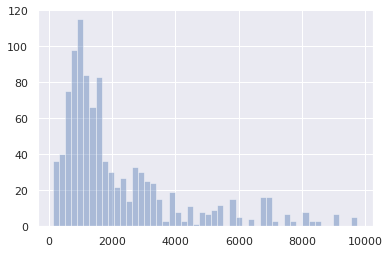

In [47]:
sns.distplot(lengths, bins=50, kde=False)
plt.show()

## Creating a CSV with Name and Lengths

This could be useful in the future.

In [48]:
df = pd.DataFrame(all_lengths, columns=['Name', 'Length'])

In [49]:
df.head()

,Name,Length
0,P27_cam01_P27_scrambledegg,3561
1,P11_cam01_P11_scrambledegg,2649
2,P27_stereo01_P27_scrambledegg,3560
3,P21_cam01_P21_scrambledegg,5281
4,P46_cam02_P46_scrambledegg,3135


In [51]:
df.to_csv(str(DIR_BREAKFAST / 'video_lengths.csv'))